#Video Level dataset

In [80]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import seaborn as sns
from IPython.display import YouTubeVideo
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
print(check_output(["ls", "../input/video_level"]).decode("utf8"))
video_lvl_record = "../input/video_level/train-1.tfrecord"
labels_df = pd.read_csv('../input/label_names.csv')

frame_level
label_names.csv
sample_submission.csv
video_level

train-0.tfrecord
train-1.tfrecord
train-2.tfrecord
train-3.tfrecord
train-4.tfrecord
train-5.tfrecord
train-6.tfrecord
train-7.tfrecord
train-8.tfrecord
train-9.tfrecord



In [61]:
## Reading video level data in tfrecord format
vid_ids = []
labels = []
mean_rgb = []
mean_audio = []

for example in tf.python_io.tf_record_iterator(video_lvl_record):
    tf_example = tf.train.Example.FromString(example)
    vid_ids.append(tf_example.features.feature['video_id'].bytes_list.value[0].decode(encoding='UTF-8'))
    labels.append(tf_example.features.feature['labels'].int64_list.value)
    mean_rgb.append(tf_example.features.feature['mean_rgb'].float_list.value)
    mean_audio.append(tf_example.features.feature['mean_audio'].float_list.value)
    
## The size of this tfrecord:
print('Number of videos in this tfrecord: ',len(vid_ids))


Number of videos in this tfrecord:  1178


### Let's explore the first video 

In [98]:
## Let's explore the first video 
from collections import Counter
label_mapping = pd.Series.from_csv('../input/label_names.csv',header=0).to_dict()
print('The video id is: %str ' %vid_ids[0]) # https://www.youtube.com/watch?v=-1VnJGJ6c2U
label_names = [label_mapping[x] for x in labels[0]]
print('The labels of this video are: ',label_names )
print('The first video has a vector of %d rgb features' %len(mean_rgb[0]))
print('The first video has a vector of %d audio features' %len(mean_audio[0]))
print('The vector rgb feature (first 10) for this video is: ')
print(mean_rgb[0][:10])
print('The vector audio feature (first 10) for this video is:') 
print(mean_audio[0][:10])


The video id is: -1VnJGJ6c2Utr 
The labels of this video are:  ['Games', 'Football', 'Animal', 'The Sims', 'Need for Speed: Most Wanted']
The first video has a vector of 1024 rgb features
The first video has a vector of 128 audio features
The vector rgb feature (first 10) for this video is: 
[-0.012599143199622631, 0.3304528594017029, -0.29592639207839966, -0.36568647623062134, -0.8026612401008606, 0.21889519691467285, 0.35500529408454895, -0.2260688841342926, -0.5064732432365417, 0.07810844480991364]
The vector audio feature (first 10) for this video is:
[0.15390920639038086, -0.5002377033233643, 0.6098828911781311, 0.3337654769420624, 0.7686942219734192, -0.30625399947166443, -0.04251023754477501, -0.988168478012085, -0.3268117904663086, 0.27072811126708984]


### Let's explore the feature vectors of the first video (rgb and audio vectors)

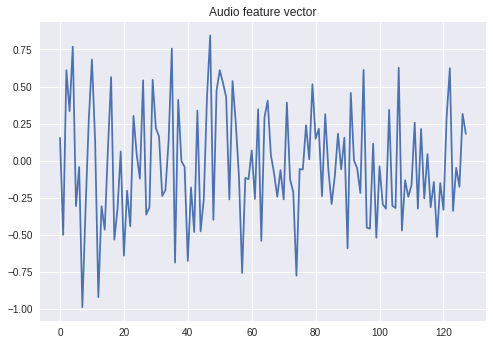

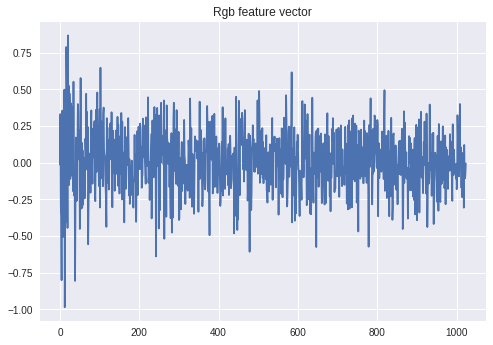

In [79]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.title('Audio feature vector')
plt.plot(mean_audio[0][:])

plt.figure(2)
plt.title('Rgb feature vector')
plt.plot(mean_rgb[0][:])

# Vocabulary

In [99]:
print(labels_df)
print("Nevertheless, we have {} unique labels in the dataset".format(len(labels_df['label_name'].unique())))

      label_id                      label_name
0            0                           Games
1            1                         Vehicle
2            2                      Video game
3            3                         Concert
4            4                             Car
5            5                           Dance
6            6                       Animation
7            7                        Musician
8            8                        Football
9            9                     Music video
10          10                          Animal
11          11                      Motorsport
12          12                            Food
13          13                Musical ensemble
14          14                          Guitar
15          15                         Cartoon
16          16                 Performance art
17          17                          Racing
18          18              Outdoor recreation
19          19                         PC game
20          2

****